### 1. Seleksi Unvariate
---
Metode paling sederhana dan tercepat didasarkan pada uji statistik univariat. Untuk setiap fitur, ukur seberapa kuat target bergantung pada fitur menggunakan uji statistik seperti  χ2 (chi-square) or ANOVA.

Uji statistik dapat digunakan untuk memilih fitur-fitur tersebut yang memiliki relasi paling kuat dengan variabel output/target.
Library scikit-learn menyediakan class *SelectKBest* yang digunakan untuk serangkaian uji statistik berbeda untuk memilih angka spesifik dari fitur. Berikut ini adalah uji statistik chi-square utk fitur non-negatif untuk memilih 10 fitur terbaik dari dataset *Mobile Price Range Prediction*.

In [ ]:
# import library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# memuat data
data = pd.read_csv("/content/sample_data/stocks.csv")
data.head()

,Open,High,Low,Close,Adj Close,Volume
0,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [ ]:
# memilih data yang dibutuhkan
X = data.iloc[:,0:5]  #independent colums
y = data.iloc[:,-1]    # target colum i.e price range

In [ ]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k=2)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs        Score
1       High  9774.311359
0       Open  9647.304120
3      Close  9593.332420
4  Adj Close  9592.658932
2        Low  9437.255397


### 2. Feature Importance
---
**Feature importance** mengacu pada kelas teknik untuk menetapkan skor ke fitur input ke model prediktif yang menunjukkan *importance* relatif dari setiap fitur saat membuat prediksi. Skor *Feature importance* dapat dihitung untuk masalah yang melibatkan prediksi nilai numerik, yang disebut regresi, dan masalah yang melibatkan prediksi label kelas, yang disebut klasifikasi.

Skor digunakan dalam berbagai situasi dalam masalah pemodelan prediktif, seperti:

* Lebih memahami data.
* Lebih memahami model.
* Mengurangi jumlah fitur input.
* memberi  skor untuk setiap fitur data, semakin tinggi skor semakin penting atau relevan fitur tersebut terhadap variabel output

Inbuilt yang dilengkapi dengan Pengklasifikasi Berbasis Pohon (Tree Based Classifier), kami akan menggunakan Pengklasifikasi Pohon Ekstra untuk mengekstraksi 10 fitur teratas untuk kumpulan data

In [ ]:
# import library
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [ ]:
# memuat data
data = pd.read_csv("/content/sample_data/stocks.csv")
X = data.iloc[:,0:5]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [ ]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.20194332 0.19825911 0.19744939 0.20263158 0.1997166 ]


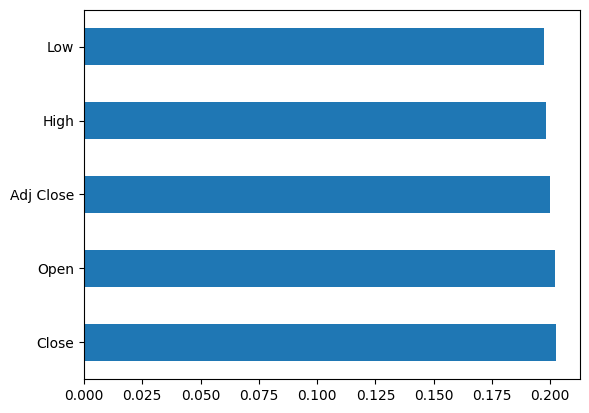

In [ ]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### 3. Matriks Korelasi dengan Heatmap
---

* Korelasi menyatakan bagaimana fitur terkait satu sama lain atau variabel target.
* Korelasi bisa positif (kenaikan satu nilai fitur meningkatkan nilai variabel target) atau negatif (kenaikan satu nilai fitur menurunkan nilai variabel target)
* Heatmap memudahkan untuk mengidentifikasi fitur mana yang paling terkait dengan variabel target, kami akan memplot peta panas fitur yang berkorelasi menggunakan seaborn library


In [ ]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# memuat data
data = pd.read_csv("/content/sample_data/stocks.csv")
X = data.iloc[:,0:5]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [ ]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = data.corr()
top_corr_features = corrmat.index

### Matriks Korelasi dengan Heatmap (lanjutan)
---

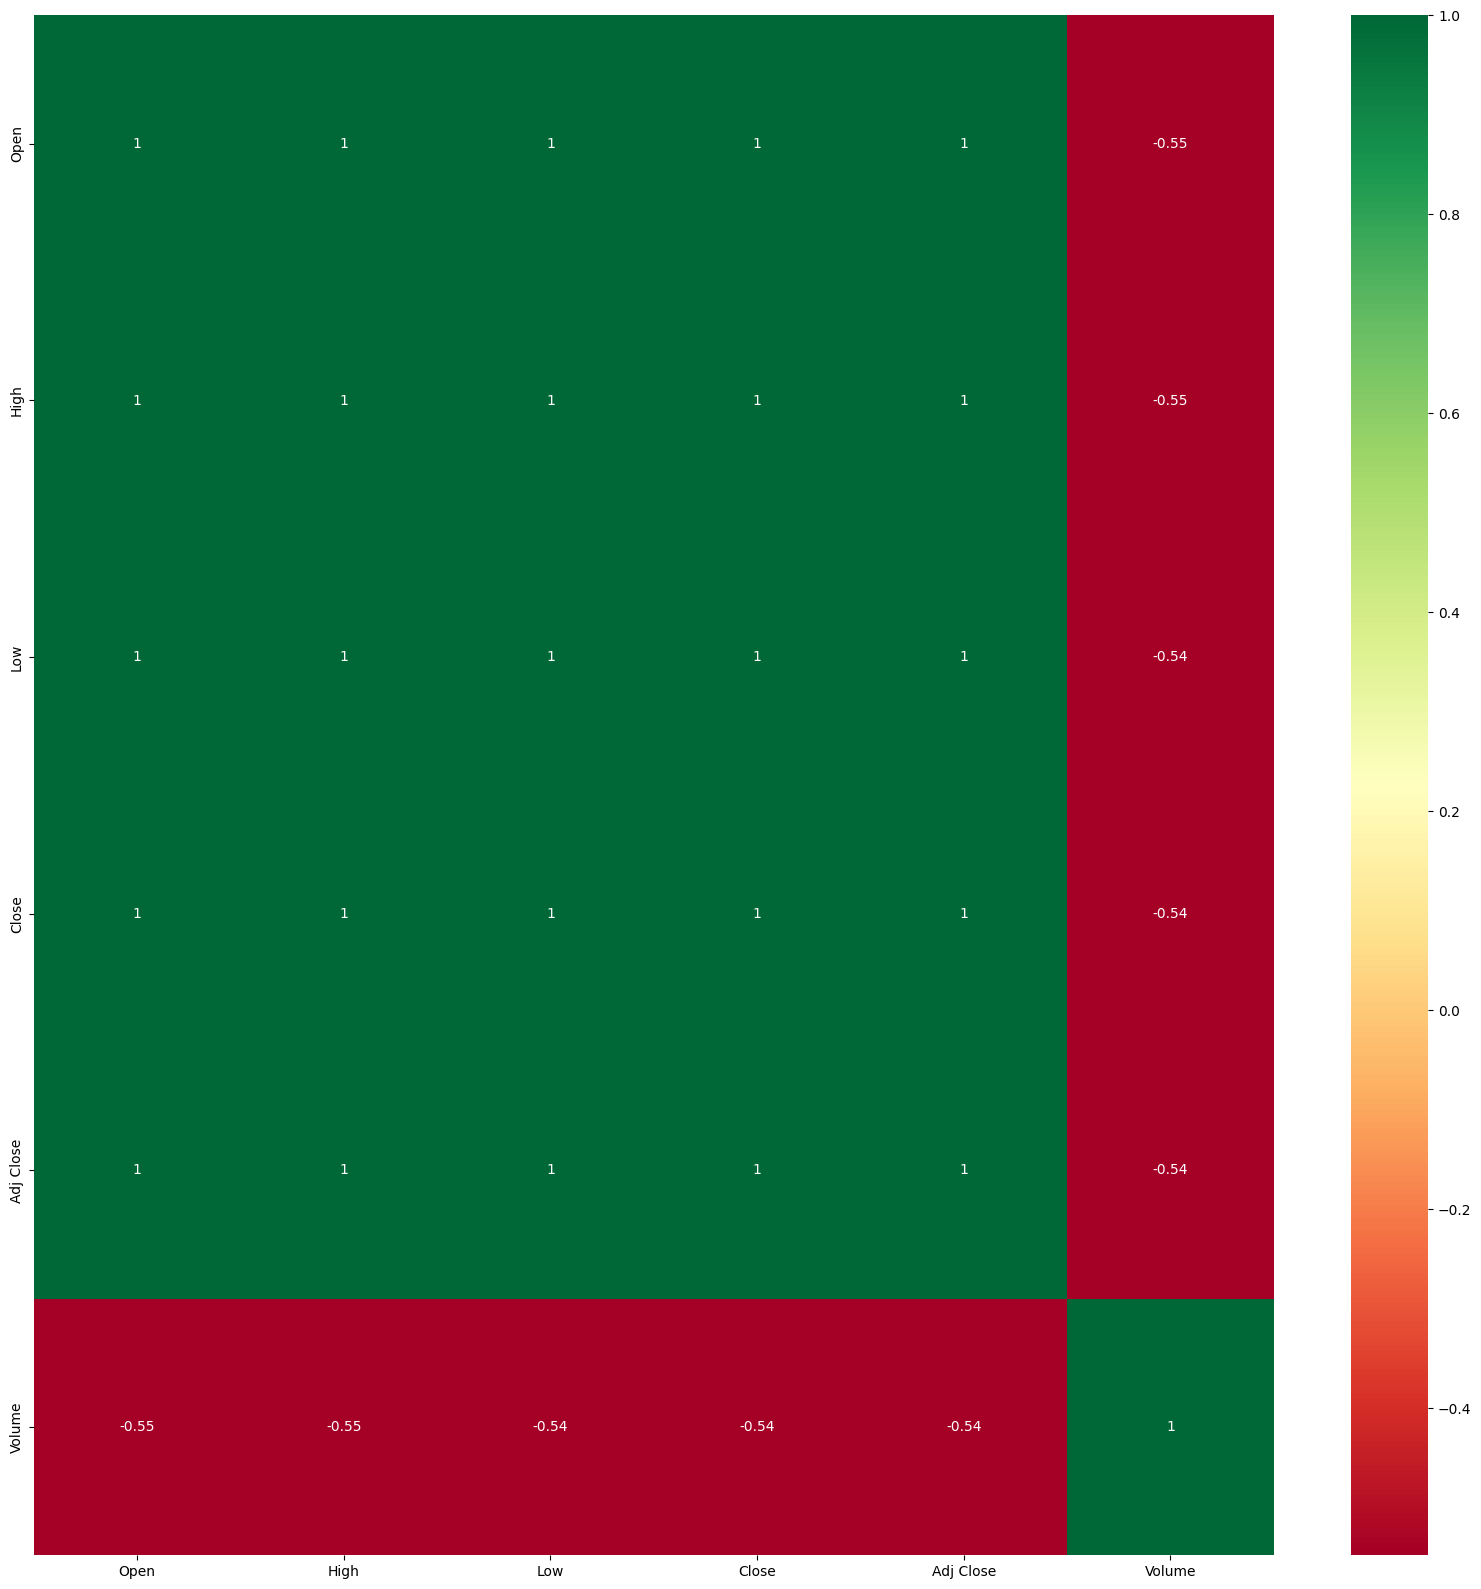

In [ ]:
# plot heatmap
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Kesimpulan
* Dapat dilihat pada heatmap di atas variabel 'Volume' memiliki korelasi yang rendah dengan variabel yang lain
* sedangkan variabel variabel lain ('open', 'high', 'low', 'clos', dan 'adj close') saling berkorelasi kecuali dengan variavel 'volume